#### 1. 서울시 구별 CCTV 현황 분석

In [44]:
import pandas as pd

##### 1) 서울시 구별 CCTV 현황

In [45]:
CCTV_Seoul = pd.read_csv('1.cctv_in_seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [46]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [47]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [48]:
CCTV_Seoul['최근증가율']=((CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전']*100)
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


##### 2) 서울시 인구 현황

In [49]:
pop_Seoul = pd.read_excel('1.population_in_seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.3/4,합계,4219001,10158411,4975437,5182974,9891448,4849195,5042253,266963,126242,140721,2.34,1353486
3,2017.3/4,종로구,73668,164640,80173,84467,155109,76155,78954,9531,4018,5513,2.11,26034
4,2017.3/4,중구,60130,134174,66064,68110,125332,62011,63321,8842,4053,4789,2.08,21249


In [50]:
pop_Seoul = pd.read_excel('1.population_in_seoul.xls', 
                          header = 2,
                          parse_cols = 'B,D,G,J,N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [51]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [52]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [53]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [54]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [55]:
pop_Seoul.drop([26],inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [56]:
pop_Seoul['외국인비율']=pop_Seoul['외국인']/pop_Seoul['인구수']*100
pop_Seoul['고령자비율']=pop_Seoul['고령자']/pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762


In [57]:
print (pop_Seoul.sort_values(by='인구수', ascending=False).head(3), '\n')
print (pop_Seoul.sort_values(by='외국인비율', ascending=False).head(3), '\n')
print (pop_Seoul.sort_values(by='고령자비율', ascending=False).head(3))

     구별       인구수       한국인     외국인      고령자     외국인비율      고령자비율
24  송파구  668366.0  661750.0  6616.0  75301.0  0.989877  11.266432
16  강서구  607877.0  601391.0  6486.0  75046.0  1.066992  12.345590
23  강남구  565731.0  560827.0  4904.0  64579.0  0.866843  11.415143 

      구별       인구수       한국인      외국인      고령자     외국인비율      고령자비율
19  영등포구  401908.0  368818.0  33090.0  53620.0  8.233228  13.341362
18   금천구  253646.0  235608.0  18038.0  33818.0  7.111486  13.332755
17   구로구  443288.0  412972.0  30316.0  58260.0  6.838895  13.142697 

    구별       인구수       한국인     외국인      고령자     외국인비율      고령자비율
9  강북구  329042.0  325552.0  3490.0  56078.0  1.060655  17.042809
2   중구  134174.0  125332.0  8842.0  21249.0  6.589950  15.836898
1  종로구  164640.0  155109.0  9531.0  26034.0  5.788994  15.812682


##### 3) 서울시 인구현황과 CCTV 현황 병합

In [87]:
data_result=pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,379,99,155,377,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,369,120,138,204,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,388,258,184,81,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,846,260,390,613,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [88]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [89]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
강동구,1010,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
강북구,831,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


##### 4) 데이터 시각화

In [91]:
import matplotlib.pyplot as plt

In [96]:
import platform 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='AppleGothic')

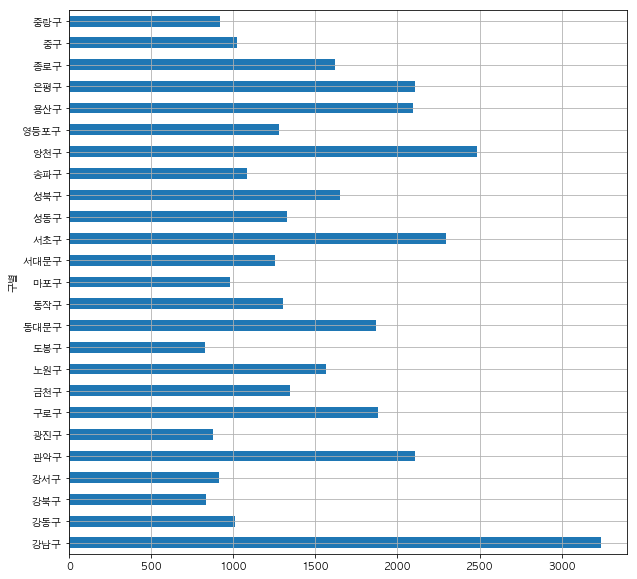

In [97]:
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

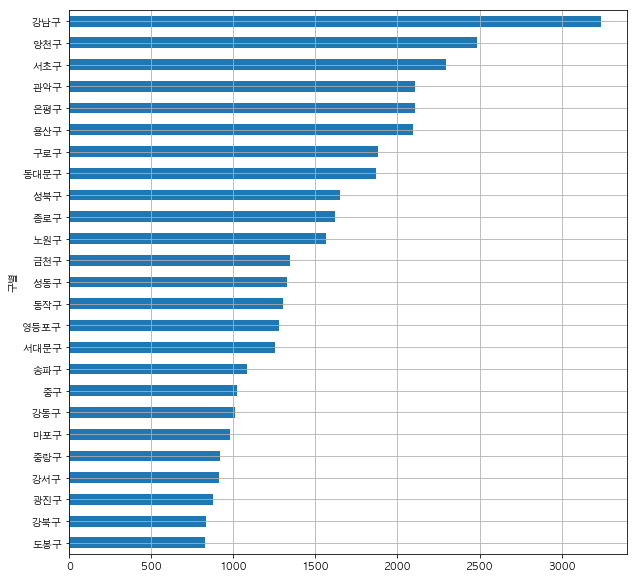

In [98]:
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

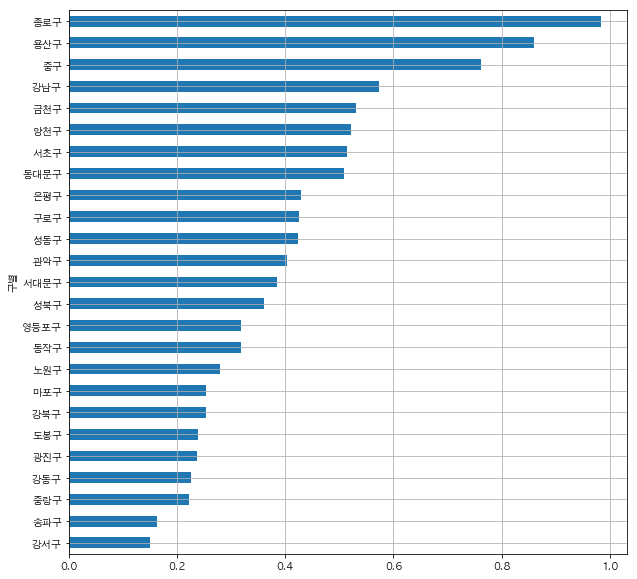

In [99]:
data_result['CCTV비율']=data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

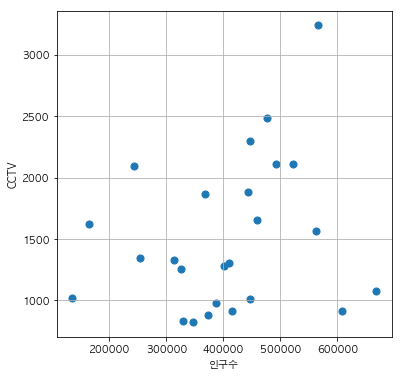

In [100]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [102]:
import numpy as np

In [103]:
fp1= np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.12481497e-03, 1.05826669e+03])

In [105]:
f1= np.poly1d(fp1)
fx= np.linspace(100000, 700000, 100)

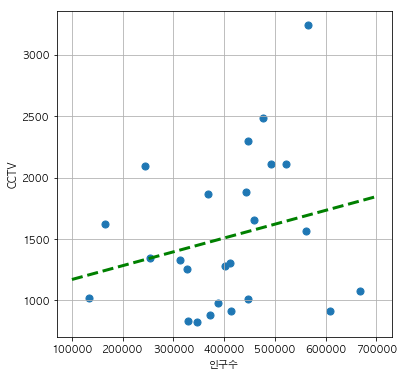

In [107]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [108]:
fp1= np.polyfit(data_result['인구수'], data_result['소계'],1)
f1= np.poly1d(fp1)
fx= np.linspace(100000, 700000, 100)

data_result['오차']=np.abs(data_result['소계']-f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.572357,1543.390613
양천구,2482,34.671731,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079,0.520743,887.616126
강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590,0.149866,831.015839
용산구,2096,53.216374,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862,0.859291,763.366194
서초구,2297,63.371266,447177.0,442833.0,4344.0,52738.0,0.971427,11.793540,0.513667,735.741927


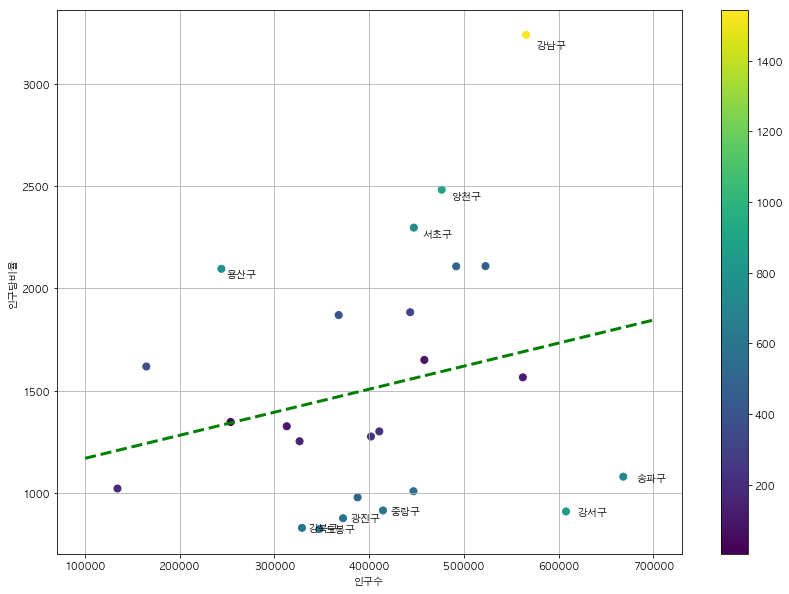

In [110]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range (10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=10)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

##### Meaning

직선을 기준으로 위에 있는 '강남구','양천구','서초구','은평구','용산구'는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역이며, '송파구','강서구','중랑구','마포구','도봉구'는 일반적인 경향보다 CCTV가 적게 설치된 지역임. 특히 '강남구'는 월등히 많은 CCTV가 설치되었지만, '송파구'는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있음.